In [28]:
# AllState claims severity challenge on QUORA - https://www.kaggle.com/c/allstate-claims-severity/data?select=train.csv

# Regression challenge

In [29]:
import pandas as pd
import numpy as np

In [30]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [31]:
# list(train_df.columns)

# Visualize the data

In [32]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

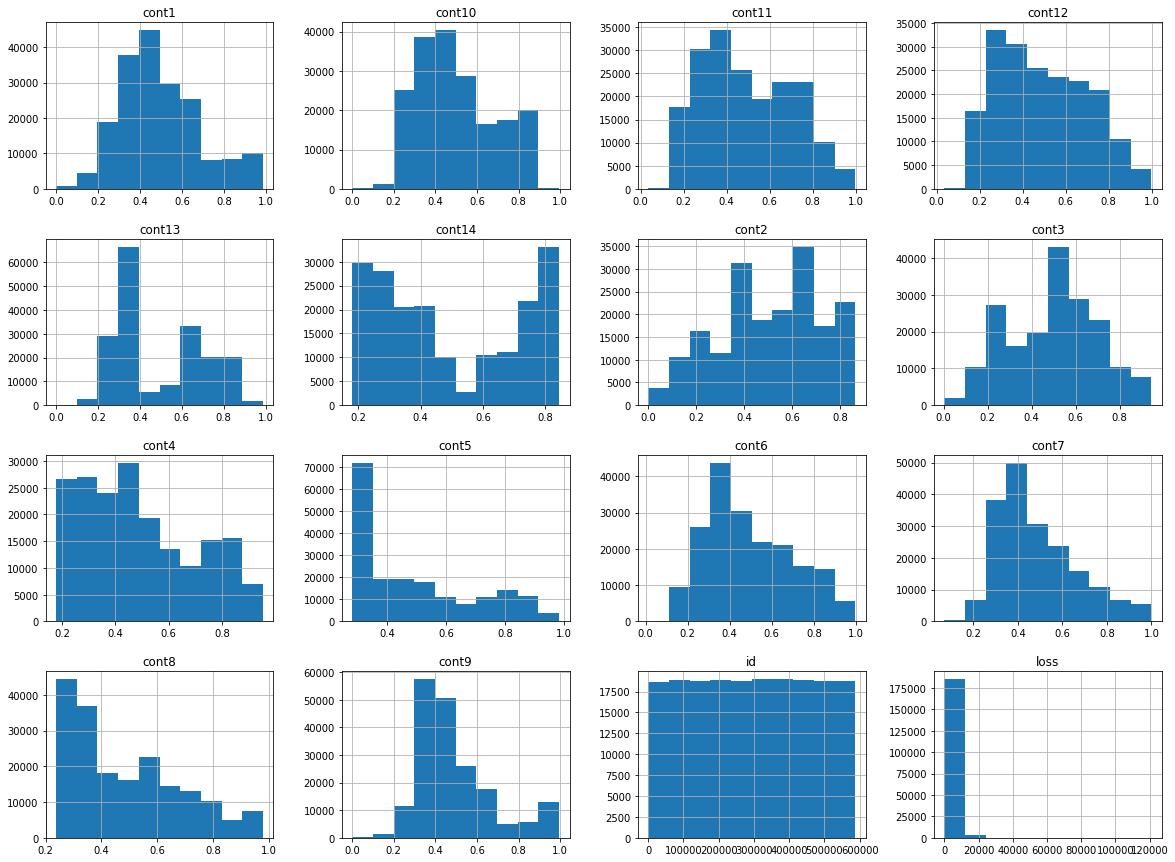

In [33]:
# Plot histograms for the integer fieldsdata.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
train_df.hist(figsize=(20, 15))
plt.show()

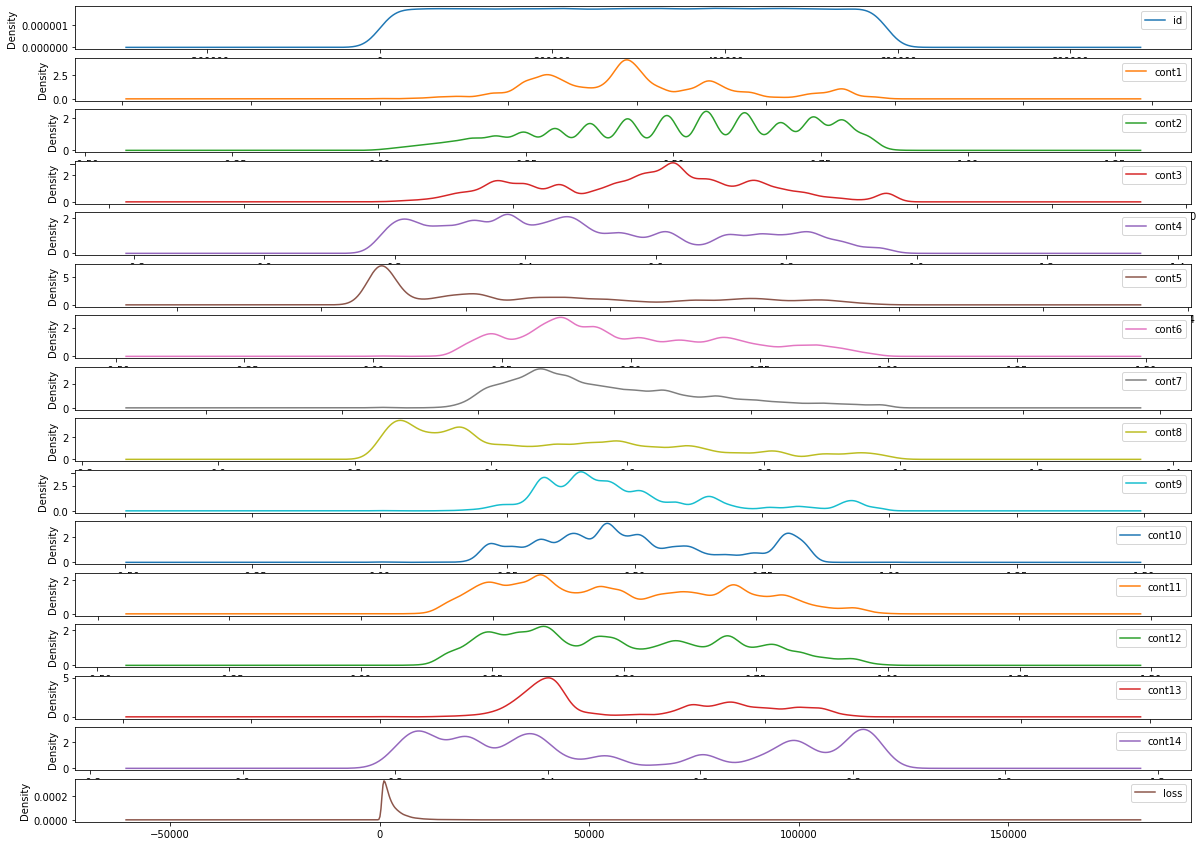

In [34]:
train_df.plot(kind='density', subplots=True, figsize=(20,15), sharex=False)
plt.show()

# Data Preprocessing

In [35]:
train_df = train_df.drop(['id'], axis = 1)
test_df = test_df.drop(['id'], axis = 1)

In [68]:
numerical_attributes = ['cont1', 'cont2', 'cont3', 'cont4', 'cont5','cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14',]
non_categorical_attributes = [attr for attr in numerical_attributes]
non_categorical_attributes.append('loss')
category_attributes = [column for column in list(train_df.columns) if column not in non_categorical_attributes]
# categorical_attributes.remove("id")

In [70]:
numerical_attributes, non_categorical_attributes, category_attributes

(['cont1',
  'cont2',
  'cont3',
  'cont4',
  'cont5',
  'cont6',
  'cont7',
  'cont8',
  'cont9',
  'cont10',
  'cont11',
  'cont12',
  'cont13',
  'cont14'],
 ['cont1',
  'cont2',
  'cont3',
  'cont4',
  'cont5',
  'cont6',
  'cont7',
  'cont8',
  'cont9',
  'cont10',
  'cont11',
  'cont12',
  'cont13',
  'cont14',
  'loss'],
 ['cat1',
  'cat2',
  'cat3',
  'cat4',
  'cat5',
  'cat6',
  'cat7',
  'cat8',
  'cat9',
  'cat10',
  'cat11',
  'cat12',
  'cat13',
  'cat14',
  'cat15',
  'cat16',
  'cat17',
  'cat18',
  'cat19',
  'cat20',
  'cat21',
  'cat22',
  'cat23',
  'cat24',
  'cat25',
  'cat26',
  'cat27',
  'cat28',
  'cat29',
  'cat30',
  'cat31',
  'cat32',
  'cat33',
  'cat34',
  'cat35',
  'cat36',
  'cat37',
  'cat38',
  'cat39',
  'cat40',
  'cat41',
  'cat42',
  'cat43',
  'cat44',
  'cat45',
  'cat46',
  'cat47',
  'cat48',
  'cat49',
  'cat50',
  'cat51',
  'cat52',
  'cat53',
  'cat54',
  'cat55',
  'cat56',
  'cat57',
  'cat58',
  'cat59',
  'cat60',
  'cat61',
  'cat62

In [86]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
train_set, test_set = train_test_split(train_df, test_size=0.2, random_state=42)

In [102]:
from sklearn.preprocessing import LabelBinarizer
class NewLabelBinarizer(LabelBinarizer):
    def fit(self, X, y=None):
        return super(NewLabelBinarizer, self).fit(X)
    def transform(self, X, y=None):
        return super(NewLabelBinarizer, self).transform(X)
    def fit_transform(self, X, y=None):
        return super(NewLabelBinarizer, self).fit(X).transform(X)

NameError: name 'LabelEncoder' is not defined

In [97]:
train_Set= train_set.drop(['loss'], axis = 1)
train_set

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
78158,A,A,A,A,B,A,A,A,A,A,...,0.281143,0.600404,0.422967,0.24564,0.68961,0.64566,0.245410,0.241676,0.304350,0.211064
178101,A,B,A,A,A,A,A,A,B,A,...,0.752295,0.507409,0.404130,0.55421,0.66201,0.60401,0.644013,0.630853,0.348267,0.356163
19857,A,B,B,A,A,A,A,A,B,B,...,0.783230,0.445589,0.759877,0.44106,0.34365,0.42828,0.596286,0.761665,0.351299,0.766969
47714,A,A,A,B,A,A,A,A,A,A,...,0.405415,0.456654,0.461365,0.36083,0.46853,0.51666,0.496100,0.485119,0.363547,0.294603
80902,B,A,A,B,A,B,A,A,A,A,...,0.281143,0.505057,0.542126,0.72775,0.40455,0.47779,0.418822,0.409777,0.310026,0.386678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,A,B,A,A,A,A,A,A,B,B,...,0.643315,0.363920,0.375150,0.45883,0.29269,0.36458,0.245410,0.241676,0.379109,0.295717
103694,A,B,A,A,A,A,A,A,B,B,...,0.499798,0.350956,0.364454,0.58354,0.44352,0.39599,0.341813,0.352251,0.342239,0.433689
131932,B,A,A,A,A,B,A,A,A,A,...,0.281143,0.305875,0.343200,0.36083,0.36091,0.36458,0.217678,0.222634,0.268941,0.220323
146867,B,B,A,A,A,A,A,A,B,A,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.732536


In [98]:
# Create a pipeline for both types of attributes, defining a operations in each tuple
from sklearn.pipeline import Pipeline
from sklearn_features.transformers import DataFrameSelector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numerical_pipeline = Pipeline([('selector', DataFrameSelector(numerical_attributes)),
                               ('imputer', SimpleImputer(strategy="median")),
                               ('std_scaler', StandardScaler()),
                              ])
category_pipeline = Pipeline([('selector', DataFrameSelector(category_attributes)),
                              ('label_binarizer', NewLabelBinarizer())
                              ])

In [99]:
# Combine both the pipelines
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[('numerical_pipeline', numerical_pipeline),
                                               ('category_pipeline', category_pipeline)])

In [100]:
len(train_df.columns)

131

In [101]:
train_prepared_df = full_pipeline.fit_transform(train_set)

ValueError: Multioutput target data is not supported with label binarization

In [85]:
for i in categorical_attributes:
    print(f"{i} : ", train_df[i].unique())

cat1 :  ['A' 'B']
cat2 :  ['B' 'A']
cat3 :  ['A' 'B']
cat4 :  ['B' 'A']
cat5 :  ['A' 'B']
cat6 :  ['A' 'B']
cat7 :  ['A' 'B']
cat8 :  ['A' 'B']
cat9 :  ['B' 'A']
cat10 :  ['A' 'B']
cat11 :  ['B' 'A']
cat12 :  ['A' 'B']
cat13 :  ['A' 'B']
cat14 :  ['A' 'B']
cat15 :  ['A' 'B']
cat16 :  ['A' 'B']
cat17 :  ['A' 'B']
cat18 :  ['A' 'B']
cat19 :  ['A' 'B']
cat20 :  ['A' 'B']
cat21 :  ['A' 'B']
cat22 :  ['A' 'B']
cat23 :  ['B' 'A']
cat24 :  ['A' 'B']
cat25 :  ['A' 'B']
cat26 :  ['A' 'B']
cat27 :  ['A' 'B']
cat28 :  ['A' 'B']
cat29 :  ['A' 'B']
cat30 :  ['A' 'B']
cat31 :  ['A' 'B']
cat32 :  ['A' 'B']
cat33 :  ['A' 'B']
cat34 :  ['A' 'B']
cat35 :  ['A' 'B']
cat36 :  ['A' 'B']
cat37 :  ['A' 'B']
cat38 :  ['A' 'B']
cat39 :  ['A' 'B']
cat40 :  ['A' 'B']
cat41 :  ['A' 'B']
cat42 :  ['A' 'B']
cat43 :  ['A' 'B']
cat44 :  ['A' 'B']
cat45 :  ['A' 'B']
cat46 :  ['A' 'B']
cat47 :  ['A' 'B']
cat48 :  ['A' 'B']
cat49 :  ['A' 'B']
cat50 :  ['A' 'B']
cat51 :  ['A' 'B']
cat52 :  ['A' 'B']
cat53 :  ['A' 'B']
ca

In [ ]:
uniqueunique